### Named Entity Recognition with spacy

#### importing sqlite wikibooks dataset

In [1]:
import sqlite3
import pandas as pd

cnx = sqlite3.connect('../input/wikibooks-dataset/wikibooks.sqlite')
df_wikibooks = pd.read_sql_query("SELECT * FROM en", cnx)
df_wikibooks.head()

,title,url,abstract,body_text,body_html
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo...,Chronic Lymphocytic Leukemia and Small Lymphoc...,Front Page: Radiation Oncology | RTOG Trials |...,"<div class=""mw-parser-output""><table width=""10..."
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==,Băuturi/Beverages[edit | edit source]\nTea : C...,"<div class=""mw-parser-output""><h2><span id=""B...."
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...,Karrigell is an open Source Python web framewo...,"<div class=""mw-parser-output""><p>Karrigell is ..."
3,Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...,https://en.wikibooks.org/wiki/The_Pyrogenesis_...,====setupUnitPanel====,setupUnitPanel[edit | edit source]\nHelper fun...,"<div class=""mw-parser-output""><h4><span class=..."
4,Wikibooks: LMIs in Control/pages/Exterior Coni...,https://en.wikibooks.org/wiki/LMIs_in_Control/...,== The Concept ==,Contents\n\n1 The Concept\n2 The System\n3 The...,"<div class=""mw-parser-output""><div id=""toc"" cl..."


#### Reading an example from the dataset

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")
wiki_ex = df_wikibooks.iloc[17]['body_text']
doc = nlp(wiki_ex)
doc

As obvious from the term, this architecture works through a cycle of Sense, Plan and Act processes.

By sensing, it means getting the required information from the available sensors and converting it to some usable form.
Planning refers to the use of available information from sensing phase to determine the control parameters and sequences required for various components in order to make the robot proceed towards final goal.
Finally, act phase is simply the implementation of the processes and sequences underlined by the planning phase.
This kind of approach is useful if the sensing process is slow and the environment is quite static. For example, on a low speed processor, image processing may require lots of time to process each frame. Hence, it might not be feasible to process every frame and react to the gathered information in real-time. If we use this technique, the information will be processed at a very low frequency, providing more time for other real-time processes to run while

#### List of entities in the example

In [3]:
print('All entity types that spacy recognised from the document above')
set([ent.label_ for ent in doc.ents])

All entity types that spacy recognised from the document above


{'LAW'}

#### Listing person and organization entities of the example

In [4]:
print('Persons from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'PERSON']))
print('Organizations from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'ORG']))

Persons from the document above
set()
Organizations from the document above
set()


### Visualizing Named Entities

In [5]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

#### Importing libraries and reading datasets

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import nltk

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from transformers import AdamW, AutoTokenizer, AutoModelForTokenClassification, get_scheduler
import torch


nltk.download('punkt')

data_dir = '../input/entity-annotated-corpus'
df = pd.read_csv(f'{data_dir}/ner_dataset.csv')
df['Sentence #'] = df['Sentence #'].ffill()
df_gr = df.groupby('Sentence #').agg(lambda x: list(x))
print(df_gr.shape)
df_gr.head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
(47959, 3)


,Word,POS,Tag
Sentence #,,,
Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]"
Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."


#### Visualizing wordcloud for geographical entities

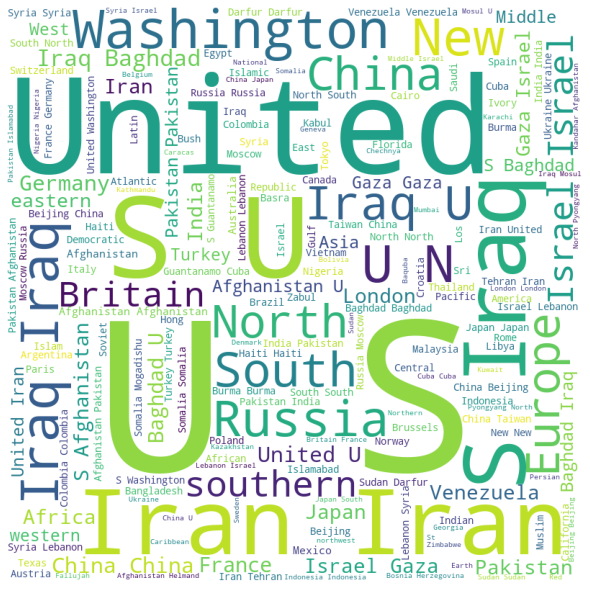

In [10]:
from wordcloud import WordCloud, STOPWORDS
geo_entities = ""
for word in df[df['Tag'] == 'B-geo']['Word'].tolist():
    geo_entities = geo_entities + " " + word
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(geo_entities)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Visualizing wordcloud for person entities

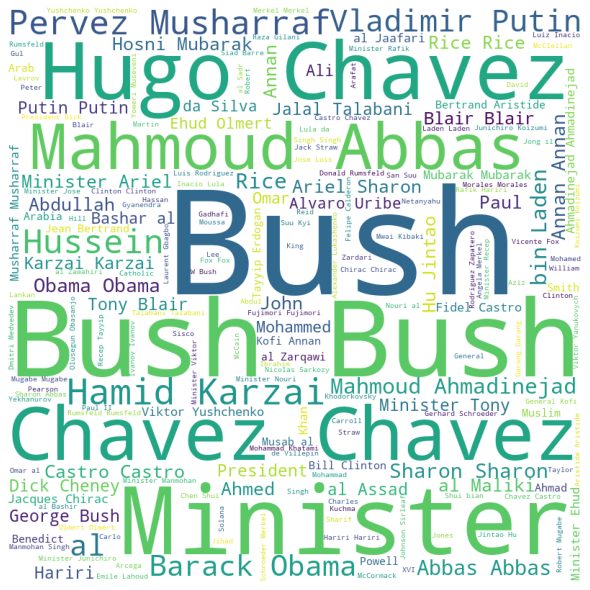

In [11]:
per_entities = ""
for word in df[df['Tag'] == 'I-per']['Word'].tolist():
    per_entities = per_entities + " " + word
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(per_entities)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Visualizing wordcloud for time entities

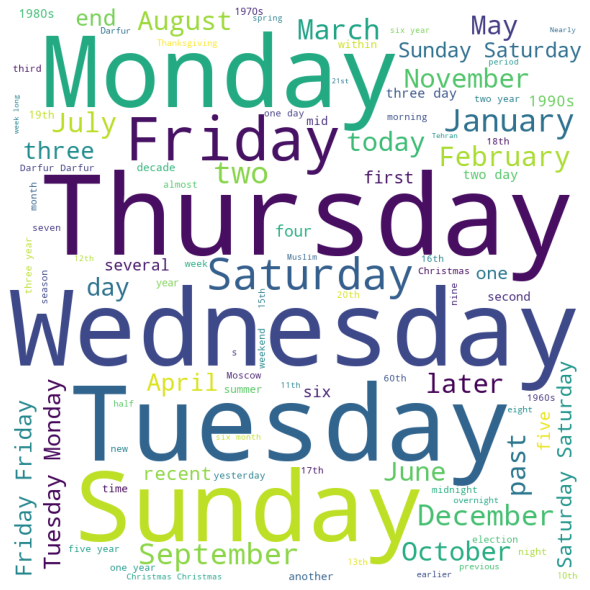

In [12]:
tim_entities = ""
for word in df[df['Tag'] == 'B-tim']['Word'].tolist():
    tim_entities = tim_entities + " " + word
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tim_entities)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Visualizing wordcloud for gpe entities

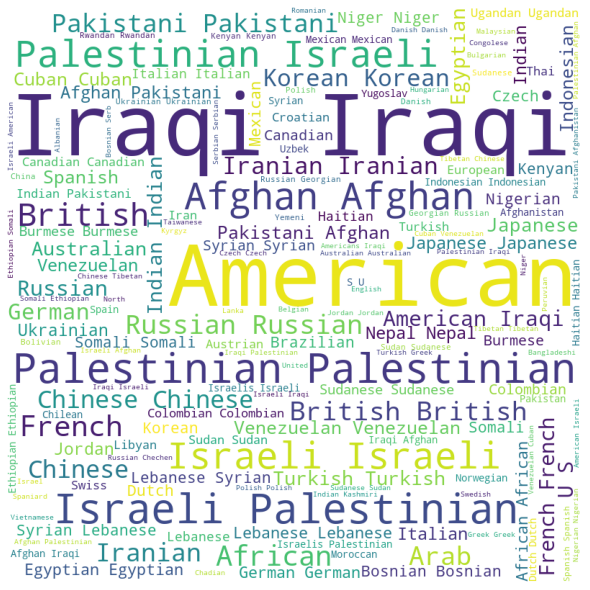

In [13]:
gpe_entities = ""
for word in df[df['Tag'] == 'B-gpe']['Word'].tolist():
    gpe_entities = gpe_entities + " " + word
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(gpe_entities)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Reading legal dataset

In [7]:
df_legal = pd.read_json("/kaggle/input/legal-ner/NER_TRAIN_JUDGEMENT.json")
df_legal.head()

,id,annotations,data,meta
0,90d9a97c7b7749ec8a4f460fda6f937e,"[{'result': [{'value': {'start': 90, 'end': 10...",{'text': ' (7) On specific query by the Bench...,{'source': 'tax_districtcourts judgement https...
1,a325c57ba5b84c6fa46bee65e6616633,"[{'result': [{'value': {'start': 26, 'end': 30...",{'text': 'He was also asked whether Agya <span...,{'source': 'criminal_punjab-haryana_high_court...
2,33cface31108441080976035ee04d07e,"[{'result': [{'value': {'start': 13, 'end': 25...","{'text': ' 5.2 CW3 Mr Vijay Mishra , Deputy M...",{'source': 'financial_districtcourts judgement...
3,08debe900b51464e9f26b5d1eecae170,[{'result': []}],{'text': 'You are hereby asked not to carry ou...,{'source': 'civil_bombay_high_court judgement ...
4,428070222cd940eba78b233829eb28b8,"[{'result': [{'value': {'start': 18, 'end': 43...",{'text': 'The pillion rider T.V. Satyanarayana...,{'source': 'motorvehicles_andhra_high_court ju...


#### Defining dataframe level preprocessing function for legal dataset

In [8]:
def preprocess_legal_ner(df):
    words = []
    tags = []
    annotations = df['annotations'].tolist()
    texts = df['data'].tolist()
    for i, text in enumerate(texts):
        annotation = annotations[i][0]['result']
        tmp_idx = 0
        word = []
        tag = []
        for ann in annotation:
            start = ann['value']['start']
            end = ann['value']['end']
            label = ann['value']['labels'][0]
            txt = ann['value']['text']
            prev = nltk.word_tokenize(text['text'][tmp_idx:start-1])
            word.extend(prev)
            tag.extend(['O'] * len(prev))
            word.append(txt)
            tag.append(label)
            tmp_idx = end + 1
        words.append(word)
        tags.append(tag)
    
    return words, tags

#### Applying preprocessing to legal dataset

In [9]:
words, tags = preprocess_legal_ner(df_legal)

In [10]:
dict_legal = {'Word': words, 'Tag': tags} 
df_legal_preprocessed = pd.DataFrame(dict_legal)

In [11]:
df_legal_preprocessed.head()

,Word,Tag
0,"[(, 7, ), On, specific, query, by, the, Bench,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[He, was, also, asked, whether, Agya, <, span,...","[O, O, O, O, O, OTHER_PERSON, O, O, O, O, O, O..."
2,"[5.2, CW3, Mr, Vijay Mishra, ,, Deputy, Manage...","[O, O, O, WITNESS, O, O, O, O, ORG, GPE, O, O,..."
3,[],[]
4,"[The, pillion, rider, T.V. Satyanarayana Murthy]","[O, O, O, OTHER_PERSON]"


#### In our case, we'll need columns `Word` (tokenized sentence) and `Tag` (entities in the sentence). Also, in order to fine-tune the model, we'll need to have the same entities as the model is trained on. Let's print entities from our data set and from the pretrained model.

In [12]:
tags = []
for tag in df_gr['Tag'].to_list():
    tags.extend(tag)
print('Entities in GMB dataset')
set(tags)

Entities in GMB dataset


{'B-art',
 'B-eve',
 'B-geo',
 'B-gpe',
 'B-nat',
 'B-org',
 'B-per',
 'B-tim',
 'I-art',
 'I-eve',
 'I-geo',
 'I-gpe',
 'I-nat',
 'I-org',
 'I-per',
 'I-tim',
 'O'}

In [13]:
len(tags)

1048575

#### Plotting tag distribution for GMB dataset

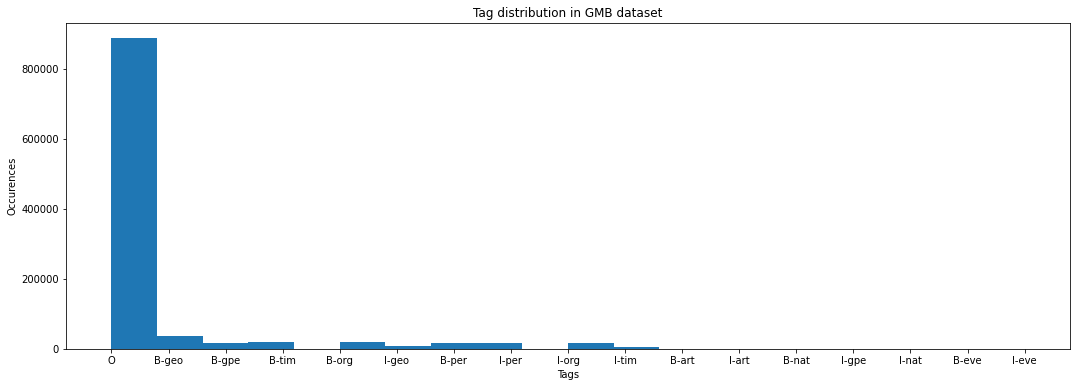

In [14]:
plt.figure(figsize=(18,6))
plt.title('Tag distribution in GMB dataset')
plt.hist(tags, bins=20)
plt.xlabel('Tags')
plt.ylabel('Occurences')
plt.savefig('gmb_dist.png')
plt.show()

#### Listing tags for legal dataset

In [15]:
tags = []
for tag in df_legal_preprocessed['Tag'].to_list():
    tags.extend(tag)
print('Entities in Legal-NER data set')
set(tags)

Entities in Legal-NER data set


{'CASE_NUMBER',
 'COURT',
 'DATE',
 'GPE',
 'JUDGE',
 'O',
 'ORG',
 'OTHER_PERSON',
 'PETITIONER',
 'PRECEDENT',
 'PROVISION',
 'RESPONDENT',
 'STATUTE',
 'WITNESS'}

In [16]:
len(tags)

176606

#### Plotting tag distribution for legal dataset

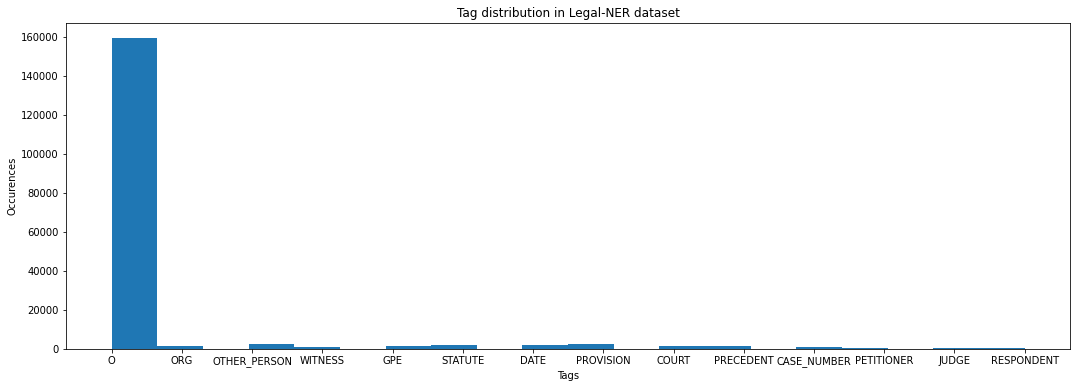

In [17]:
plt.figure(figsize=(18,6))
plt.title('Tag distribution in Legal-NER dataset')
plt.hist(tags, bins=20)
plt.xlabel('Tags')
plt.ylabel('Occurences')
plt.savefig('legal_ner_dist.png')
plt.show()

#### Defining entity mapping for GMB dataset to match bert-base-NER model

In [18]:
entity_mapping = {
'O':0,'B-per':3, 'I-per':4, 'B-org':5, 'I-org':6,'B-geo':7, 'I-geo':8,
'B-art':1, 'B-eve':1 , 'B-gpe':1, 'B-nat':1, 'B-tim':1,
'I-art':1, 'I-eve':1 , 'I-gpe':1, 'I-nat':1, 'I-tim':1,
}

#### Initializing bert-base-NER model to inspect pre-trained labels

In [19]:
MODEL_NAME = "dslim/bert-base-NER"
MAX_LEN = 128
#MODEL_NAME = "microsoft/deberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForTokenClassification.from_pretrained(MODEL_NAME)

print('Entities from the pretrained model')
model.config.id2label

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

Entities from the pretrained model


{0: 'O',
 1: 'B-MISC',
 2: 'I-MISC',
 3: 'B-PER',
 4: 'I-PER',
 5: 'B-ORG',
 6: 'I-ORG',
 7: 'B-LOC',
 8: 'I-LOC'}

#### Defining entity mapping for legal dataset to match the model

In [20]:
legal_entity_mapping = {
    'O':0, 'CASE_NUMBER':1, 'COURT':5,
    'DATE':1, 'GPE':4, 'JUDGE':5,
    'ORG':5, 'OTHER_PERSON':3, 'PETITIONER':3,
    'PRECEDENT':1, 'PROVISION':1, 'RESPONDENT': 3,
    'STATUTE': 1, 'WITNESS':3
}

#### Defining dataset class
#### Create the mapping for converting entities from our data set into the entity id (key) from the 0

In [21]:
class NERDataset:
    def __init__(self, df):
        # input is annotated data frame
        self.texts = df['Word'].to_list()
        self.tags = df['Tag'].to_list()
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, item):
        text = self.texts[item]
        tags = self.tags[item]
        
        ids = []
        target_tag =[]
        
        # tokenize words and define tags accordingly
        # running -> [run, ##ning]
        # tags - ['O', 'O']
        for i, s in enumerate(text):
            inputs = tokenizer.encode(s, add_special_tokens=False)
            input_len = len(inputs)
            ids.extend(inputs)
            target_tag.extend([entity_mapping[tags[i]]] * input_len)
        
        # truncate
        ids = ids[:MAX_LEN - 2]
        target_tag = target_tag[:MAX_LEN - 2]
        
        # add special tokens
        ids = [101] + ids + [102]
        target_tag = [0] + target_tag + [0]
        mask = [1] * len(ids)
        token_type_ids = [0] * len(ids)
        
        # construct padding
        padding_len = MAX_LEN - len(ids)
        ids = ids + ([0] * padding_len)
        mask = mask + ([0] * padding_len)
        token_type_ids = token_type_ids + ([0] * padding_len)
        target_tag = target_tag + ([0] * padding_len)
        
        return {'input_ids': torch.tensor(ids, dtype=torch.long),
                'attention_mask': torch.tensor(mask, dtype=torch.long),
                'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
                'labels': torch.tensor(target_tag, dtype=torch.long)
               }

In [22]:
class NERLegalDataset:
    def __init__(self, df):
        # input is annotated data frame
        self.texts = df['Word'].to_list()
        self.tags = df['Tag'].to_list()
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, item):
        text = self.texts[item]
        tags = self.tags[item]
        
        ids = []
        target_tag =[]
        
        # tokenize words and define tags accordingly
        # running -> [run, ##ning]
        # tags - ['O', 'O']
        for i, s in enumerate(text):
            inputs = tokenizer.encode(s, add_special_tokens=False)
            input_len = len(inputs)
            ids.extend(inputs)
            target_tag.extend([legal_entity_mapping[tags[i]]] * input_len)
        
        # truncate
        ids = ids[:MAX_LEN - 2]
        target_tag = target_tag[:MAX_LEN - 2]
        
        # add special tokens
        ids = [101] + ids + [102]
        target_tag = [0] + target_tag + [0]
        mask = [1] * len(ids)
        token_type_ids = [0] * len(ids)
        
        # construct padding
        padding_len = MAX_LEN - len(ids)
        ids = ids + ([0] * padding_len)
        mask = mask + ([0] * padding_len)
        token_type_ids = token_type_ids + ([0] * padding_len)
        target_tag = target_tag + ([0] * padding_len)
        
        return {'input_ids': torch.tensor(ids, dtype=torch.long),
                'attention_mask': torch.tensor(mask, dtype=torch.long),
                'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
                'labels': torch.tensor(target_tag, dtype=torch.long)
               }

#### Defining further preprocessing function to splitting, converting dataframe to dataset class to dataloader for each dataset

In [ ]:
def preprocess_gmb(df):
    df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
    df_val, df_test = train_test_split(df_val, test_size=0.5, random_state=42)

    df_legal_train, df_legal_val = train_test_split(df_legal_preprocessed, test_size=0.2, random_state=42)
    df_legal_val, df_legal_test = train_test_split(df_legal_val, test_size=0.5, random_state=42)

    data_train = NERDataset(df_train)
    data_val = NERDataset(df_val)
    data_test = NERDataset(df_test)

    # initialize DataLoader used to return batches for training/validation
    loader_train = torch.utils.data.DataLoader(
        data_train, batch_size=32, num_workers=4
    )

    loader_val = torch.utils.data.DataLoader(
        data_val, batch_size=32, num_workers=4
    )
    return loader_train, loader_val

In [ ]:
def preprocess_legal(df):
    df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
    df_val, df_test = train_test_split(df_val, test_size=0.5, random_state=42)

    df_legal_train, df_legal_val = train_test_split(df_legal_preprocessed, test_size=0.2, random_state=42)
    df_legal_val, df_legal_test = train_test_split(df_legal_val, test_size=0.5, random_state=42)

    data_train = NERLegalDataset(df_train)
    data_val = NERLegalDataset(df_val)
    data_test = NERLegalDataset(df_test)

    # initialize DataLoader used to return batches for training/validation
    loader_train = torch.utils.data.DataLoader(
        data_train, batch_size=32, num_workers=4
    )

    loader_val = torch.utils.data.DataLoader(
        data_val, batch_size=32, num_workers=4
    )
    return loader_train, loader_val

In [ ]:
loader_train, loader_val = preprocess_gmb(df_gr)
loader_legal_train, loader_legal_val = preprocess_legal(df_legal_preprocessed)

### Defining train function

In [24]:
def train(model, loader_train, loader_val):
    train_hist = {'train_losses': [],
        'train_accs': [],
        'train_f1s': [],
        'val_losses': [],
        'val_accs': [],
        'val_f1s': []}
    progress_bar = tqdm(range(num_training_steps))
    for epoch in range(num_epochs):
        model.train()
        final_loss = 0
        predictions , true_labels = [], []
        for batch in loader_train:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            true_labels.extend(batch['labels'].detach().cpu().numpy().ravel())
            predictions.extend(np.argmax(outputs[1].detach().cpu().numpy(), axis=2).ravel())

            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()
            progress_bar.update(1)
            final_loss+=loss.item()

        train_hist['train_losses'].append(final_loss/len(loader_train))
        print(f'Training loss: {final_loss/len(loader_train)}')
        train_hist['train_f1s'].append(f1_score(predictions, true_labels, average='macro'))
        print('Training F1: {}'.format(f1_score(predictions, true_labels, average='macro')))
        train_hist['train_accs'].append(accuracy_score(predictions, true_labels))
        print(f'Training acc: {accuracy_score(predictions, true_labels)}')
        print('*'*20)

        model.eval()
        final_loss = 0
        predictions , true_labels = [], []
        for batch in loader_val:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            final_loss+=outputs.loss.item()
            true_labels.extend(batch['labels'].detach().cpu().numpy().ravel())
            predictions.extend(np.argmax(outputs[1].detach().cpu().numpy(), axis=2).ravel())
        train_hist['val_losses'].append(final_loss/len(loader_val))
        print(f'Validation loss: {final_loss/len(loader_val)}')
        train_hist['val_f1s'].append(f1_score(predictions, true_labels, average='macro'))
        print('Vallidation F1: {}'.format(f1_score(predictions, true_labels, average='macro')))
        train_hist['val_accs'].append(accuracy_score(predictions, true_labels))
        print(f'Validaton acc: {accuracy_score(predictions, true_labels)}')
        print('*'*20)
    return train_hist

#### Defining a function to plot model training history

In [25]:
def plot_hist(train_hist):
    # Plotting train and validation loss graph
    plt.title('Loss')
    plt.plot(train_hist['train_losses'], label='train')
    plt.plot(train_hist['val_losses'], label='test')
    plt.legend()
    plt.savefig('loss_graph.png')
    plt.show()

    # Plotting train and validation accuracy graph
    plt.title('Accuracy')
    plt.plot(train_hist['train_accs'], label='train')
    plt.plot(train_hist['val_accs'], label='test')
    plt.legend()
    plt.savefig('acc_graph.png')
    plt.show()

    # Plotting train and validation F1 score graph
    plt.title('F1 score')
    plt.plot(train_hist['train_f1s'], label='train')
    plt.plot(train_hist['val_f1s'], label='test')
    plt.legend()
    plt.savefig('f1_graph.png')
    plt.show()

### Initializing bert-base-NER model, optimizer and learning rate scheduler

In [26]:
model = AutoModelForTokenClassification.from_pretrained(MODEL_NAME)

param_optimizer = list(model.classifier.named_parameters())
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=5e-5,
    eps=1e-12
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

num_epochs = 10
num_training_steps = num_epochs * len(loader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

#### Training and plotting history

In [27]:
hist = train(model, loader_train, loader_val)
plot_hist(hist)

#### Testing the model

In [28]:
test_sentence = """
Mr. Trump’s tweets began just moments after a Fox News report by Mike Tobin, a 
reporter for the network, about protests in Minnesota and elsewhere. 
"""
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []

for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(label_idx)
        new_tokens.append(token)
        
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(model.config.id2label[label], token))

#### Training the bert-base-NER model on legal dataloader

In [29]:
num_training_steps = num_epochs * len(loader_legal_train)
hist = train(model, loader_legal_train, loader_legal_val)
plot_hist(hist)

#### Testing the model

In [30]:
test_sentence = """
Mr. Trump’s tweets began just moments after a Fox News report by Mike Tobin, a 
reporter for the network, about protests in Minnesota and elsewhere. 
"""
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []

for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(label_idx)
        new_tokens.append(token)
        
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(model.config.id2label[label], token))

### Now we transition into DeBERTa model

In [31]:
MODEL_NAME = "microsoft/deberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

#### Create new dataloader with DeBERTa tokenizer

In [32]:
data_train = NERDataset(df_train)
data_val = NERDataset(df_val)
data_test = NERDataset(df_test)

data_legal_train = NERLegalDataset(df_legal_train)
data_legal_val = NERLegalDataset(df_legal_val)
data_legal_test = NERLegalDataset(df_legal_test)

# initialize DataLoader used to return batches for training/validation
loader_train = torch.utils.data.DataLoader(
    data_train, batch_size=32, num_workers=4
)

loader_val = torch.utils.data.DataLoader(
    data_val, batch_size=32, num_workers=4
)

loader_legal_train = torch.utils.data.DataLoader(
    data_legal_train, batch_size=32, num_workers=4
)

loader_legal_val = torch.utils.data.DataLoader(
    data_legal_val, batch_size=32, num_workers=4
)

Downloading:   0%|          | 0.00/474 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

In [33]:
model_deberta = AutoModelForTokenClassification.from_pretrained(MODEL_NAME, num_labels=)

param_optimizer = list(model_deberta.classifier.named_parameters())
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=5e-5,
    eps=1e-12
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_deberta.to(device)

# add scheduler to linearly reduce the learning rate throughout the epochs.
num_epochs = 10
num_training_steps = num_epochs * len(loader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

#### Training DeBERTa model on GMB dataset

In [34]:
hist = train(model_deberta, loader_train, loader_val)
plot_hist(hist)

#### Testing the model

In [ ]:
test_sentence = """
Mr. Trump’s tweets began just moments after a Fox News report by Mike Tobin, a 
reporter for the network, about protests in Minnesota and elsewhere. 
"""
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()
with torch.no_grad():
    output = model_deberta(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []

for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(label_idx)
        new_tokens.append(token)
        
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(model_deberta.config.id2label[label], token))

#### Training DeBERTa model on legal dataset

In [35]:
num_training_steps = num_epochs * len(loader_legal_train)
hist = train(model_deberta, loader_legal_train, loader_legal_val)
plot_hist(hist)

#### Testing the model

In [ ]:
test_sentence = """
Mr. Trump’s tweets began just moments after a Fox News report by Mike Tobin, a 
reporter for the network, about protests in Minnesota and elsewhere. 
"""
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()
with torch.no_grad():
    output = model_deberta(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []

for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(label_idx)
        new_tokens.append(token)
        
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(model_deberta.config.id2label[label], token))

#### Preprocessing the legal dataset with original 14 labels

In [36]:
legal_entity_mapping = {
    'O':0, 'CASE_NUMBER':1, 'COURT':2,
    'DATE':3, 'GPE':4, 'JUDGE':5,
    'ORG':6, 'OTHER_PERSON':7, 'PETITIONER':8,
    'PRECEDENT':9, 'PROVISION':10, 'RESPONDENT': 11,
    'STATUTE': 12, 'WITNESS':13
}

data_legal_train = NERLegalDataset(df_legal_train)
data_legal_val = NERLegalDataset(df_legal_val)
data_legal_test = NERLegalDataset(df_legal_test)

loader_legal_train = torch.utils.data.DataLoader(
    data_legal_train, batch_size=32, num_workers=4
)

loader_legal_val = torch.utils.data.DataLoader(
    data_legal_val, batch_size=32, num_workers=4
)

model_deberta = AutoModelForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(legal_entity_mapping))

param_optimizer = list(model_deberta.classifier.named_parameters())
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=5e-5,
    eps=1e-12
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_deberta.to(device)

# add scheduler to linearly reduce the learning rate throughout the epochs.
num_epochs = 10
num_training_steps = num_epochs * len(loader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

Downloading:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaForTokenClassification: ['lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'deberta.embeddings.position_embeddings.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForTokenClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initial

#### Training DeBERTa model with 14 class legal dataset

  0%|          | 0/2360 [00:00<?, ?it/s]

Training loss: 1.5786168110572685
Training F1: 0.02726377995796342
Training acc: 0.17116392587440382
********************
Validation loss: 1.2136746644973755
Vallidation F1: 0.027103141284548295
Validaton acc: 0.1862158669141039
********************
Training loss: 1.1989089328858813
Training F1: 0.03655076634618357
Training acc: 0.20721652258876525
********************
Validation loss: 1.0803569118181864
Vallidation F1: 0.05054499615847051
Validaton acc: 0.19155123276776245
********************
Training loss: 1.1091413386797502
Training F1: 0.052067877818189244
Training acc: 0.22801362943826178
********************
Validation loss: 0.987675541639328
Vallidation F1: 0.06531022568047536
Validaton acc: 0.19731740455991517
********************
Training loss: 1.0432962709564273
Training F1: 0.06314844039449545
Training acc: 0.26656171336777956
********************
Validation loss: 0.9192221879959106
Vallidation F1: 0.07912375339301261
Validaton acc: 0.20098753976670203
********************


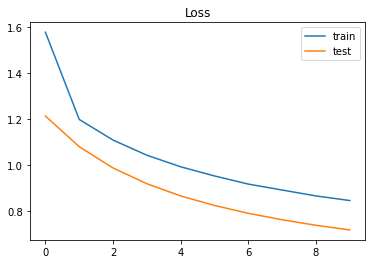

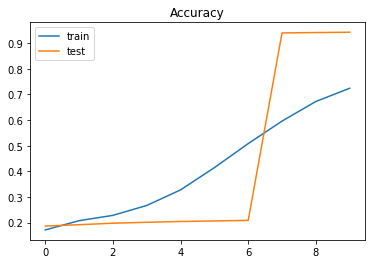

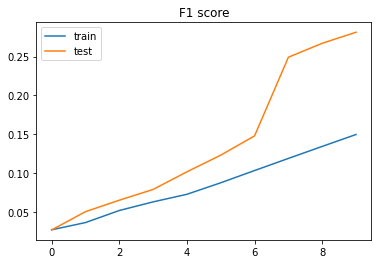

In [37]:
num_training_steps = num_epochs * len(loader_legal_train)
hist = train(model_deberta, loader_legal_train, loader_legal_val)
plot_hist(hist)

#### Testing the model

In [41]:
test_sentence = """
Mr. Trump’s tweets began just moments after a Fox News report by Mike Tobin, a 
reporter for the network, about protests in Minnesota and elsewhere. 
"""
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()
with torch.no_grad():
    output = model_deberta(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []

for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(label_idx)
        new_tokens.append(token)
        
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(model_deberta.config.id2label[label], token))

LABEL_10	[CLS]
LABEL_0	Ċ
LABEL_9	Mr
LABEL_9	.
LABEL_13	ĠTrump
LABEL_9	âĢ
LABEL_0	Ļ
LABEL_10	s
LABEL_2	Ġtweets
LABEL_10	Ġbegan
LABEL_10	Ġjust
LABEL_3	Ġmoments
LABEL_3	Ġafter
LABEL_9	Ġa
LABEL_3	ĠFox
LABEL_0	ĠNews
LABEL_9	Ġreport
LABEL_9	Ġby
LABEL_7	ĠMike
LABEL_7	ĠTob
LABEL_0	in
LABEL_3	,
LABEL_10	Ġa
LABEL_10	Ġ
LABEL_9	Ċ
LABEL_0	re
LABEL_0	porter
LABEL_0	Ġfor
LABEL_0	Ġthe
LABEL_0	Ġnetwork
LABEL_3	,
LABEL_0	Ġabout
LABEL_0	Ġprotests
LABEL_0	Ġin
LABEL_9	ĠMinnesota
LABEL_9	Ġand
LABEL_0	Ġelsewhere
LABEL_9	.
LABEL_0	Ġ
LABEL_9	Ċ
LABEL_13	[SEP]


<a id =topic11> </a>
<div class="heading">
   <h1><span style="color: white">Other Usefull Resources and References</span></h1>
</div>